In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math
import pickle

In [2]:
sns.set_style("whitegrid")

# Factor Analysis

In [3]:
factors = pd.read_csv("./factors.csv")

In [4]:
factors

,factor,throughput,kernels
0,baseline,10.0,566615.750000
1,1% tolerance,23.1,200247.450000
2,cutoff,4800.0,609.969100
3,1% tolerance+cutoff,51000.0,151.139068
4,+equiwidth,85000.0,90.919384
5,+grid,114000.0,55.398756


In [6]:
def make_factor_chart(ys):
    xs = np.array(range(len(ys)))
    fig = plt.figure()
    ax = plt.subplot(111)
    ax.bar(
        xs + 0.5,
        ys,
        log=True,
    )
    rects = ax.patches
    for rect, label in zip(rects, ys):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width()/2, 
            height,
            int(label),
            ha='center', va='bottom',
        )

    ax.grid(False, axis='x')
    ax.set_xticks(xs+1)
    return fig,ax

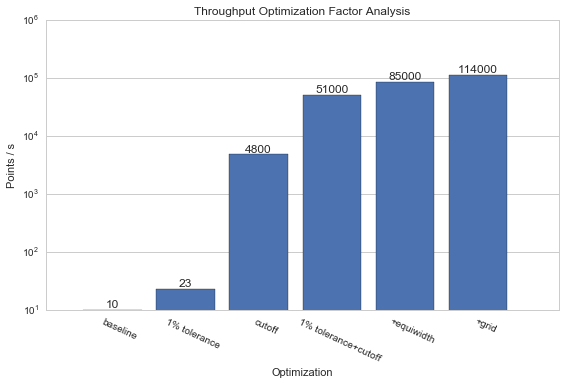

In [9]:
fig, ax = make_factor_chart(factors.throughput)
ax.set_xticklabels(list(factors.factor), rotation=-25)
ax.set_title("Throughput Optimization Factor Analysis")
ax.set_ylabel("Points / s")
ax.set_xlabel("Optimization")
fig.tight_layout()
fig.savefig("../figures/factor.pdf")

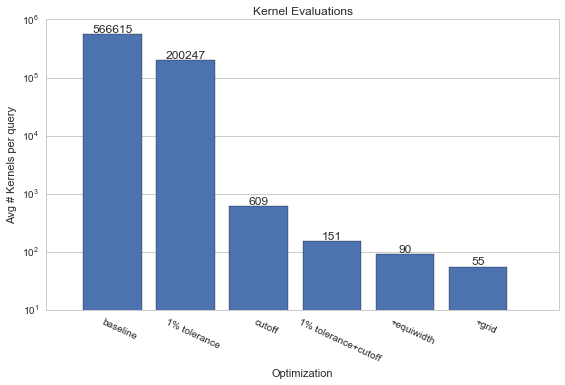

In [11]:
fig, ax = make_factor_chart(factors["kernels"])
ax.set_xticklabels(list(factors.factor), rotation=-25)
ax.set_title("Kernel Evaluations")
ax.set_ylabel("Avg # Kernels per query")
ax.set_xlabel("Optimization")
fig.tight_layout()
fig.savefig("../figures/kernel_count.pdf")

# Lesions

In [5]:
lesions = pd.read_csv("./lesion.csv")
lesions

,lesion,Num Scored,Scoring Time,throughput,Total Kernels,kernels
0,Baseline,500000,3.650,136986.301400,27699378,55.398756
1,Tolerance,50000,5.750,8695.652174,37719841,754.396820
2,Cutoff,50,1.697,29.463760,9659249,193184.980000
3,Equiwidth,500000,8.230,60753.341430,49021247,98.042494
4,Grid,500000,5.370,93109.869650,45459692,90.919384


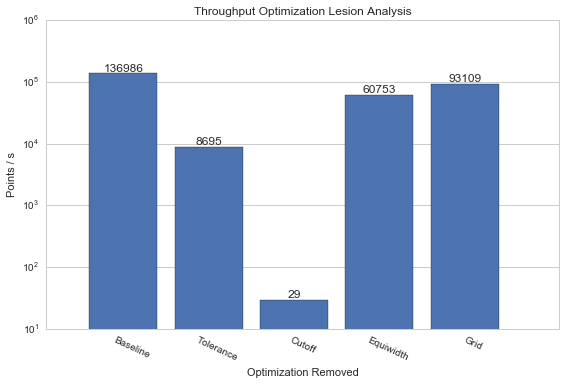

In [10]:
fig, ax = make_factor_chart(lesions.throughput)
ax.set_xticklabels(list(lesions.lesion), rotation=-25)
ax.set_title("Throughput Optimization Lesion Analysis")
ax.set_ylabel("Points / s")
ax.set_xlabel("Optimization Removed")
fig.tight_layout()
fig.savefig("../figures/lesion.pdf")

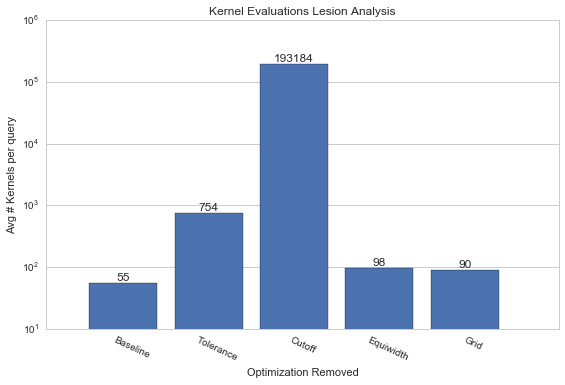

In [11]:
fig, ax = make_factor_chart(lesions.kernels)
ax.set_xticklabels(list(lesions.lesion), rotation=-25)
ax.set_title("Kernel Evaluations Lesion Analysis")
ax.set_ylabel("Avg # Kernels per query")
ax.set_xlabel("Optimization Removed")
fig.tight_layout()
fig.savefig("../figures/lesion_kernels.pdf")

# Impact of Quantile Estimation Precision

In [29]:
quantiles = pd.read_csv("./results/quantile_impact.csv")
quantiles

,Percentile,Ratio,Runtime
0,1.0,1.0,2.0
1,1.5,1.1,2.5
2,2.0,1.3,3.5
3,4.0,2.0,6.0
4,10.0,3.0,10.0


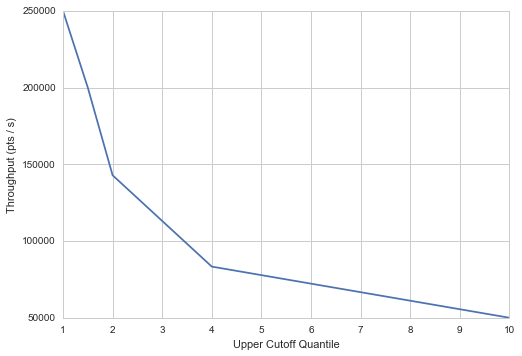

In [43]:
fig = plt.figure()
ax = plt.subplot(111)
throughput = 500000/quantiles["Runtime"]
ax.plot(quantiles["Percentile"],throughput)
ax.set_xlabel("Upper Cutoff Quantile")
ax.set_ylabel("Throughput (pts / s)")
fig.savefig("./figures/cutoff_quantile_throughput.pdf")

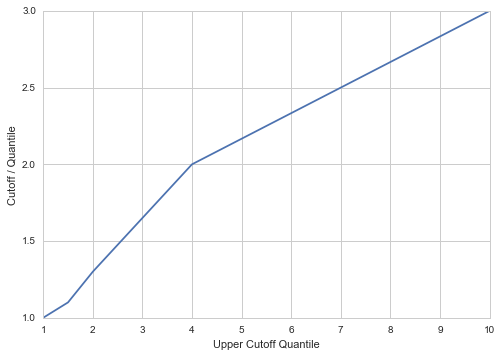

In [44]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(quantiles["Percentile"],quantiles["Ratio"])
ax.set_xlabel("Upper Cutoff Quantile")
ax.set_ylabel("Cutoff / Quantile")
fig.savefig("./figures/cutoff_quantile_ratio.pdf")

# Accuracy

Table
CDF comparison

# Scalability

In [22]:
dimensions = pd.read_csv("./scale_dim.csv")
dimensions

,dim,train,score,data
0,1,2.72,1.11,energy500k
1,2,1.93,1.10,NaN
2,3,2.29,1.76,NaN
3,4,2.89,3.71,NaN
4,5,4.13,5.31,NaN
5,6,5.78,7.48,NaN
6,7,9.57,10.06,NaN
7,8,10.07,12.38,NaN


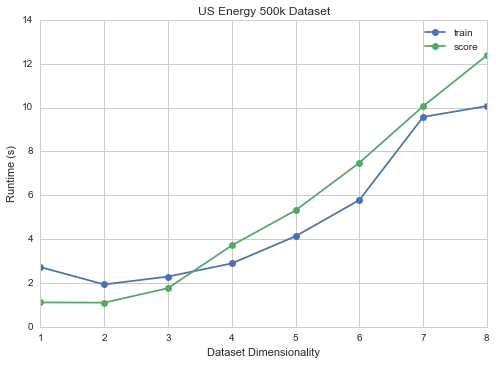

In [26]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(dimensions["dim"],dimensions["train"],marker='o')
ax.plot(dimensions["dim"],dimensions["score"],marker='o')
ax.set_xlabel("Dataset Dimensionality")
ax.set_ylabel("Runtime (s)")
ax.set_title("US Energy 500k Dataset")
ax.legend()
fig.savefig("../figures/scalability_dim.pdf")

In [13]:
size = pd.read_csv("../results/scale_size.csv")
size

,Dataset Size,train,score
0,100000,1.78,0.389
1,200000,1.85,1.000
2,300000,2.78,1.960
3,400000,3.73,2.840
4,500000,3.80,4.000
5,700000,4.51,7.220
6,1000000,6.22,12.000


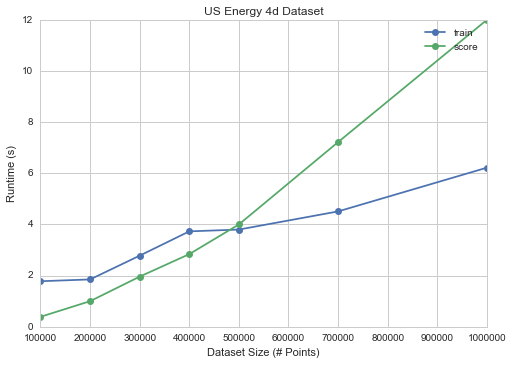

In [23]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(size["Dataset Size"],size["train"], marker='o')
ax.plot(size["Dataset Size"],size["score"], marker='o')
# ax.set_xscale("log")
# ax.set_yscale("log")
ax.set_xlabel("Dataset Size (# Points)")
ax.set_ylabel("Runtime (s)")
ax.set_title("US Energy 4d Dataset")
ax.legend()
fig.savefig("../figures/scalability_size.pdf")